In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from operator import attrgetter
from datetime import timedelta

In [2]:
# игнорируем предупреждения
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# 1. Загрузка и описание  данных 

In [3]:
# загрузим первый датасет

df_cust = pd.read_csv('olist_customers_dataset.csv')
df_cust.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# посмотрим форму первого датасета 

df_cust.shape


(99441, 5)

In [5]:
# посмотрим количество уникальных значений

df_cust.nunique()


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [6]:
# загрузим второй датасет

df_ord = pd.read_csv('olist_orders_dataset.csv')
df_ord.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# посмотрим форму второго датасета 

df_ord.shape


(99441, 8)

In [8]:
# посмотрим количество уникальных значений

df_ord.nunique()


order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [9]:
# загрузим третий датасет

df_item = pd.read_csv('olist_order_items_dataset.csv')
df_item.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
# посмотрим форму третьего датасета 

df_item.shape


(112650, 7)

In [11]:
# посмотрим количество уникальных значений

df_item.nunique()


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [12]:
# объединим три датафрейма в один

df = pd.merge(df_ord, df_item, on='order_id', how='left')
df = pd.merge(df, df_cust, on='customer_id', how='left')
df.nunique()


order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
dtype: int64

In [13]:
# посмотрим общую информацию

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

После загрузки и соедиения датасетов в один датафрейм видим, что количество строк и столбцов суммировалось правильно.  

Общая информация показывает, что в трех столбцах имеются пропуски и столбцы с значением даты имеют тип object, котрый нужно поменять на тип datetime64.

In [14]:
# поменяем тип object на datetime64 у столбцов с датами

df[['order_purchase_timestamp',\
    'order_approved_at',\
    'order_delivered_carrier_date',\
    'order_delivered_customer_date',\
    'order_estimated_delivery_date',\
    'shipping_limit_date']] = df[['order_purchase_timestamp',\
                                  'order_approved_at',\
                                  'order_delivered_carrier_date',\
                                  'order_delivered_customer_date',\
                                  'order_estimated_delivery_date',\
                                  'shipping_limit_date']].apply(pd.to_datetime)


In [15]:
# проверим типы данных после изменения

df.dtypes


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [16]:
# найдем количество дубликатов

df.duplicated().sum()


0

Из выше полученных данных можно отметить, что всего уникальных клиентов 96096. Заказы доставляются в 4119 города из 27 штатов. Заказ может иметь 8 статусов. Ассортимент магазина составляет 32951 товар. 

## 1.1. Работа с пропусками

In [17]:
# найдем количество пропусков в датасете

df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [18]:
# найдем процент пропусков датасета

round((df.isnull().sum() / len(df)) * 100,2)


order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.14
order_delivered_carrier_date     1.74
order_delivered_customer_date    2.85
order_estimated_delivery_date    0.00
order_item_id                    0.68
product_id                       0.68
seller_id                        0.68
shipping_limit_date              0.68
price                            0.68
freight_value                    0.68
customer_unique_id               0.00
customer_zip_code_prefix         0.00
customer_city                    0.00
customer_state                   0.00
dtype: float64

In [19]:
# посмотрим пропуски в столбце order_approved_at

df_app_date_isna = df[df['order_approved_at'].isna()]
df_app_date_isna


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1294,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,NaN,NaN,NaN,NaT,NaN,NaN,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP
2040,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,NaN,NaN,NaN,NaT,NaN,NaN,08642cd329066fe11ec63293f714f2f8,33030,santa luzia,MG
2121,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,NaN,NaN,NaN,NaT,NaN,NaN,c219f4ac1bc7f1aea33e6ab8885831e8,68742,castanhal,PA
2310,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,NaN,NaN,NaN,NaT,NaN,NaN,a8dd81392e5eee5d979c629a76abec2a,13059,campinas,SP
2457,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,NaN,NaN,NaN,NaT,NaN,NaN,29dc4aeff866d6a940c471a3ea4faef0,5752,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111391,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25,NaN,NaN,NaN,NaT,NaN,NaN,40d1c2a6b8ac6ccc102d473ff51cc46d,29156,cariacica,ES
112225,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16,NaN,NaN,NaN,NaT,NaN,NaN,aa75afb965e89078d8681fe33aaaeded,12940,atibaia,SP
112793,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10,NaN,NaN,NaN,NaT,NaN,NaN,13d7bd0b05e18b00f415221b3bb69348,9810,sao bernardo do campo,SP
113236,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaN,NaN,NaN,NaT,NaN,NaN,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP


Заказы, в которых пропуски в столбце с датой подтверждения оплаты (order_approved_at) имеют статус доставлен (delivered), поэтому скорее всего это техническая ошибка. Доля пропусков в данном столбце составляет 0.01%, поэтому целесообразно данные пропуски удалить.

In [20]:
# удалим пропуски в стобце order_approved_at

df = df.dropna(subset=['order_approved_at'])
df.shape

(113264, 18)

In [21]:
# посмотрим пропуски в столбце order_item_id

df_order_item_id_isna = df[df['order_item_id'].isna()]
df_order_item_id_isna


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,NaN,NaN,NaN,NaT,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,NaN,NaN,NaN,NaT,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,NaN,NaN,NaN,NaT,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA
1326,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,NaN,NaN,NaN,NaT,NaN,NaN,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113090,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27,NaN,NaN,NaN,NaT,NaN,NaN,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP
113184,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,NaN,NaN,NaN,NaT,NaN,NaN,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaN,NaN,NaN,NaT,NaN,NaN,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [22]:
# посмотрим количество заказов и с каким статусом  в датафрейме, где имеются пропуски в столбце order_item_id

df_order_item_id_isna['order_status'].value_counts()


unavailable    603
canceled        23
invoiced         2
shipped          1
Name: order_status, dtype: int64

In [23]:
df_order_item_id_isna.query('order_status == "shipped"')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
26478,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01,NaN,NaN,NaN,NaT,NaN,NaN,f15a952dfc52308d0361288fbf42c7b3,91250,porto alegre,RS


In [24]:
# посмотрим пропуски в столбце order_delivered_carrier_date

df_deli_date_isna = df[df['order_delivered_carrier_date'].isna()]
df_deli_date_isna


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.9,16.05,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
118,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,1.0,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35.0,15.35,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC
148,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,1.0,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.9,12.38,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,NaN,NaN,NaN,NaT,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
369,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,1.0,ca17b18b38db6e0d2c33d362322f2a06,4be2e7f96b4fd749d52dff41f80e39dd,2016-10-21 16:24:45,267.0,32.84,07d5b1f9bdd053347f0213187b343ac9,3531,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113184,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,NaN,NaN,NaN,NaT,NaN,NaN,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP
113284,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,1.0,0a57f7d2c983bcf8188589a5fea4a8da,4342d4b2ba6b161468c63a7e7cfce593,2018-01-19 07:18:05,129.9,14.66,965191786b70912f793e4a777fd623cd,13050,campinas,SP
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaN,NaN,NaN,NaT,NaN,NaN,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [25]:
# посмотрим количество заказов и с каким статусом  в датафрейме, где имеются пропуски в столбце order_delivered_carrier_date

df_deli_date_isna['order_status'].value_counts()


unavailable    610
canceled       489
invoiced       361
processing     357
approved         3
delivered        2
Name: order_status, dtype: int64

Выше найденная информация показывает, что у 2 заказов стоит статус доставлено (delivered), а даты о передачи в логистическую службу отсутствует. Дополнительно рассмотрим 2 заказа со статусом доставлено. У остальных заказов логичное отсутствие даты о передаче заказа в логистическую компанию. 

In [26]:
# найдем 2 заказа со статусом доставлено и с пропуском в дате о передаче в логистическую службу

deli_order = df_deli_date_isna.query('order_status == "delivered"')
deli_order


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
83453,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,1.0,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,2017-10-18 10:07:16,179.0,14.98,a2ac81ecc3704410ae240e74d4f0af40,13334,indaiatuba,SP
105606,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,1.0,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.0,15.00,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS


У одного заказа стоит дата доставки, поэтому целесообразно пропуск заменить на среднее значение даты передачи заказа в логистическую службу.  А второй заказ удалить, так как отсутствует и дата доставки. 

In [27]:
# удаление заказа с отсутствующими датами

df = df.drop (index= 110621 )
df.shape

(113263, 18)

In [28]:
# найдем среднее значение даты между датой подтверждения оплаты и датой передачи заказа в логистическую компанию

mean_date = (df['order_delivered_carrier_date'] - df['order_approved_at']).mean()
mean_date

Timedelta('2 days 20:25:34.971070153')

In [29]:
df.order_delivered_carrier_date[98532] = df.order_approved_at[98532] + mean_date

df.query('customer_id == "afeb16c7f46396c0ed54acb45ccaaa40" ')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
83453,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,1.0,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,2017-10-18 10:07:16,179.0,14.98,a2ac81ecc3704410ae240e74d4f0af40,13334,indaiatuba,SP


In [30]:
# проверим пропуски в столбце order_delivered_carrier_date

rpoverka = df[df['order_delivered_carrier_date'].isna()]
rpoverka

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.9,16.05,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
118,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,1.0,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35.0,15.35,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC
148,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,1.0,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.9,12.38,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,NaN,NaN,NaN,NaT,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
369,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,1.0,ca17b18b38db6e0d2c33d362322f2a06,4be2e7f96b4fd749d52dff41f80e39dd,2016-10-21 16:24:45,267.0,32.84,07d5b1f9bdd053347f0213187b343ac9,3531,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113184,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,NaN,NaN,NaN,NaT,NaN,NaN,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP
113284,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,1.0,0a57f7d2c983bcf8188589a5fea4a8da,4342d4b2ba6b161468c63a7e7cfce593,2018-01-19 07:18:05,129.9,14.66,965191786b70912f793e4a777fd623cd,13050,campinas,SP
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaN,NaN,NaN,NaT,NaN,NaN,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [31]:
# посмотрим количество заказов и с каким статусом  в датафрейме, где имеются пропуски в столбце order_delivered_carrier_date

rpoverka['order_status'].value_counts()


unavailable    610
canceled       489
invoiced       360
processing     357
approved         3
delivered        2
Name: order_status, dtype: int64

In [32]:
# посмотрим пропуски в столбце order_delivered_customer_date

df_isna_date_customer = df[df['order_delivered_customer_date'].isna()]
df_isna_date_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
46,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,1.0,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
118,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,1.0,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35.00,15.35,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC
148,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,1.0,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.90,12.38,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
185,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113184,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19,NaN,NaN,NaN,NaT,NaN,NaN,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06,NaN,NaN,NaN,NaT,NaN,NaN,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP
113284,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,1.0,0a57f7d2c983bcf8188589a5fea4a8da,4342d4b2ba6b161468c63a7e7cfce593,2018-01-19 07:18:05,129.90,14.66,965191786b70912f793e4a777fd623cd,13050,campinas,SP
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaN,NaN,NaN,NaT,NaN,NaN,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [33]:
# посмотрим количество заказов и с каким статусом  в датафрейме, где имеются пропуски в столбце order_delivered_customer_date

df_isna_date_customer['order_status'].value_counts()


shipped        1186
unavailable     610
canceled        558
invoiced        360
processing      357
delivered         8
approved          3
Name: order_status, dtype: int64

Выше найденная информация показывает отсутствие даты доставки у 7 заказов с статусом доставлен, поэтому данные заказы удалим. Остальные заказы логичное отсутствие дат.

In [34]:
# найдем все заказы датафрейма по всем статусам

df['order_status'].value_counts()

delivered      110182
shipped          1186
unavailable       610
canceled          565
invoiced          360
processing        357
approved            3
Name: order_status, dtype: int64

Видно, что все заказы по определеным статусам совпадает с найденными заказами, в которых есть пропуски, но не совпадает с заказами со статусом отменен, скорее всего 7 заказов отменили после их доставки клиенту.

In [35]:
# найдем заказы со статусом доставлено и с пропуском в дате о доставке заказа

deli_order2 = df_isna_date_customer.query('order_status == "delivered"')
deli_order2.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3376,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,1.0,a50acd33ba7a8da8e9db65094fa990a4,8581055ce74af1daba164fdbd55a40de,2017-12-04 17:56:40,117.30,17.53,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP
23485,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,1.0,2167c8f6252667c0eb9edd51520706a1,0bb738e4d789e63e2267697c42d35a2d,2018-06-26 07:19:05,329.00,25.24,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP
49966,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1.0,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 17:15:12,139.00,19.07,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP
90294,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,1.0,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 22:15:14,139.00,19.07,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP
94388,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,1.0,ec165cd31c50585786ffda6feff5d0a6,8bdd8e3fd58bafa48af76b2c5fd71974,2018-07-05 21:29:54,188.99,15.63,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP
105606,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,1.0,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.00,15.00,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS
111339,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,1.0,a2a7efc985315e86d4f0f705701b342b,ed4acab38528488b65a9a9c603ff024a,2018-06-18 12:30:35,110.99,9.13,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP
111783,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,1.0,55bfa0307d7a46bed72c492259921231,343e716476e3748b069f980efbaa294e,2018-07-03 16:29:30,45.90,9.07,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP


In [36]:
df.shape

(113263, 18)

In [37]:
# удаление заказа с отсутствующими датами

df.drop(deli_order2.index, axis=0,inplace=True)
df.shape

(113255, 18)

In [38]:
# проверим пропуски в датасете

df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1820
order_delivered_customer_date    3074
order_estimated_delivery_date       0
order_item_id                     629
product_id                        629
seller_id                         629
shipping_limit_date               629
price                             629
freight_value                     629
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

## 1.2.  Выбросы и аномалии датафрейма

In [39]:
# статистические данные датафрейма

df.describe()


,order_item_id,price,freight_value,customer_zip_code_prefix
count,112626.000000,112626.000000,112626.000000,113255.000000
mean,1.197867,120.652462,19.990646,35106.930652
std,0.705189,183.648512,15.807763,29864.666721
min,1.000000,0.850000,0.000000,1003.000000
25%,1.000000,39.900000,13.080000,11250.000000
50%,1.000000,74.990000,16.260000,24322.000000
75%,1.000000,134.900000,21.150000,59020.000000
max,21.000000,6735.000000,409.680000,99990.000000


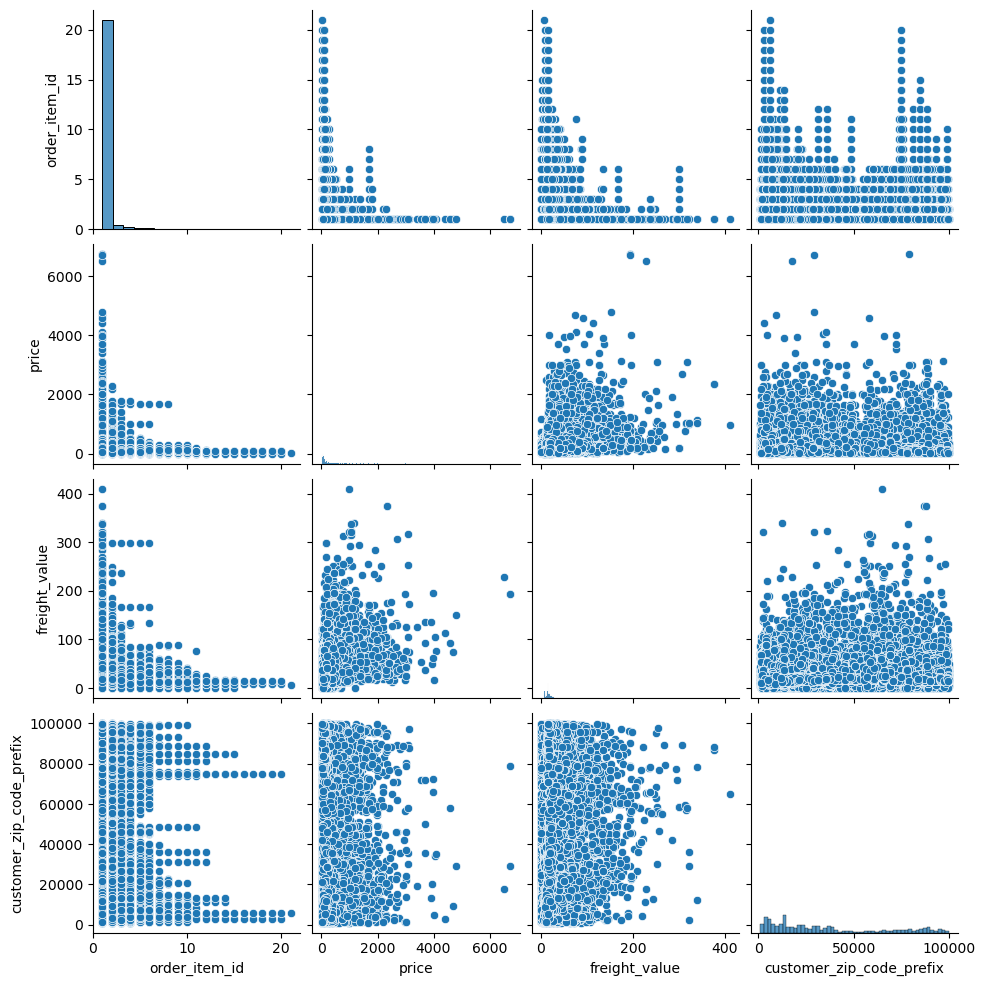

In [40]:
sns.pairplot(df)

По статистическим данным и графикам видно, что есть выбросы в столбцах order_item_id, price, freight_value так как есть большая разница между максимальным значением и 75% процентилем.

# 2. Выполнение заданий

Перед выполнением заданий дадим определение покупке и дате покупки. Покупкой будет считаться заказ со статусом "доставлено" (delivered) или "отправлено" (shipped) или "обробатывается" (processing). Датой покупки считается дата подтверждения оплаты в столбце order_approved_at.

In [41]:
# найдем все статусы заказов

df.order_status.unique()   


array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'approved'], dtype=object)

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [42]:
#посчитаем количество пользователей, которые совершили одну покупку и получили свой заказ или заказ отправлен в логистическую службу

pokupka = ['delivered' , 'shipped', 'processing']

status_deli = df.query("order_status in @pokupka")\
                .groupby('customer_unique_id', as_index=False)\
                .agg({'order_id': 'nunique'})\
                .query('order_id == 1')\
                .agg({'customer_unique_id': 'nunique'})

print('Количество пользователей, которые совершили покупку только 1 раз: ', status_deli)


Количество пользователей, которые совершили покупку только 1 раз:  customer_unique_id    91794
dtype: int64


In [43]:
# посчитаем общее количество пользователей 

user =  df.customer_unique_id.nunique()

print('Общее количество пользователей:', user)


Общее количество пользователей: 95988


In [44]:
# найдем первоначальную и конечные даты датасета

min_date = df['order_approved_at'].min()
print('Первоначальная дата:', min_date)

max_date = df['order_approved_at'].max()
print('Конечная дата:', max_date)


Первоначальная дата: 2016-09-15 12:16:38
Конечная дата: 2018-09-03 17:40:06


In [45]:
# найдем времееной период датасета

period = max_date.year - min_date.year
print('Временной период датасета составляет', period, 'года')


Временной период датасета составляет 2 года


За 2 года с сентября 2016 по сентябрь 2018 года из всех 95988 пользователей 91794 совершили покупку только 1 раз. 

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

В данном задании не доставленным заказом будет считаться заказ, который имеет статус "недоступен" и "отменен".

In [46]:
# сделаем фильтрацию заказов с недоставленным статусом

undelivered_orders = df[df['order_status'].isin(['unavailable', 'canceled'])]

undelivered_orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,NaN,NaN,NaN,NaT,NaN,NaN,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
448,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,1.0,ad673c1cd02b966e931f9db4fdc34791,9646c3513289980f17226a2fc4720dbd,2018-08-14 04:10:26,25.0,8.34,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,NaN,NaN,NaN,NaT,NaN,NaN,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP
705,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,1.0,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,2018-02-01 21:58:39,69.9,26.11,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,NaN,NaN,NaN,NaT,NaN,NaN,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP


In [47]:
undelivered_orders.shape

(1175, 18)

In [48]:
# сгруппируем заказы по месяцу и найдем их среднее количество


undelivered_orders['month'] = undelivered_orders['order_purchase_timestamp'].dt.to_period('M')

undelivered = undelivered_orders.groupby(['order_status', 'month'], as_index=False)['order_id'].nunique()\
                                .groupby('order_status').agg({'order_id': 'mean'})

undelivered

,order_id
order_status,
canceled,22.0
unavailable,29.0


In [49]:
#найдем общее количество отмененных заказов в месяц 

undelivered_orders_count = undelivered_orders.groupby(['order_status', 'month'], as_index=False)['order_id'].nunique()

undelivered_orders_count


,order_status,month,order_id
0,canceled,2016-09,2
1,canceled,2016-10,18
2,canceled,2017-01,2
3,canceled,2017-02,15
4,canceled,2017-03,31
5,canceled,2017-04,14
6,canceled,2017-05,20
7,canceled,2017-06,12
8,canceled,2017-07,23
9,canceled,2017-08,21


In [50]:
# общее количество заказов 

undelivered_reasons = undelivered_orders.groupby('order_status').size()

undelivered_reasons


order_status
canceled       565
unavailable    610
dtype: int64

<Figure size 1000x600 with 0 Axes>

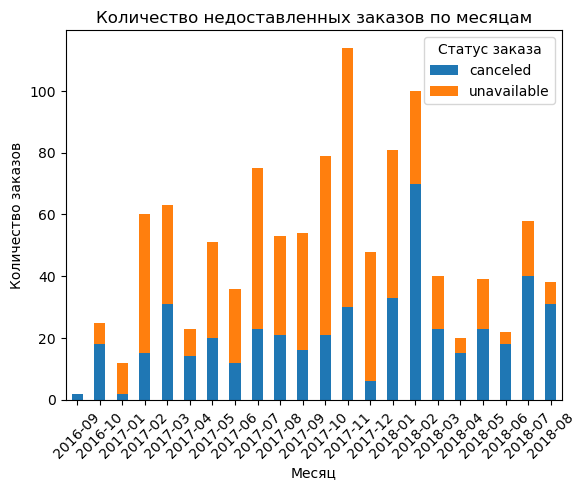

In [51]:
# построим график количества недоставленных заказов по месяцам

grouped_data = undelivered_orders_count.groupby(['month', 'order_status'])['order_id'].sum().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Количество недоставленных заказов по месяцам')
plt.legend(title='Статус заказа')
plt.xticks(rotation=45)
plt.show()

Если отвечать на поставленный вопрос, то в месяц в среднем  не доставляется 22 заказа по причине "отменен" (canceled) и 29 заказов по причине "недоступен" (unavailable). Частой причиной является недоступность, 610 заказов и 565 заказа со статусом "отменен".

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

В данном задании день недели будем определять исходя из даты подтверждения оплаты заказа это и будет считаться, что товар купили.

In [52]:
# создадим новый столбец с названием дня недели исходя из даты подтверждения оплаты заказа (order_approved_at)

df['day_payments'] = df['order_approved_at'].dt.day_name()

df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_payments
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday


In [53]:
# найдем количество товара в заказе с группировкой по дням недели оплаты заказа

product_day = df.groupby(['product_id', 'day_payments'], as_index=False)['order_item_id'].sum()
                
product_day = product_day.sort_values('product_id')

product_day.head(20)

,product_id,day_payments,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1.0
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1.0
2,0009406fd7479715e4bef61dd91f2462,Friday,1.0
3,000b8f95fcb9e0096488278317764d19,Friday,1.0
4,000b8f95fcb9e0096488278317764d19,Wednesday,1.0
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1.0
6,0011c512eb256aa0dbbb544d8dffcf6e,Thursday,2.0
7,00126f27c813603687e6ce486d909d01,Sunday,2.0
8,001795ec6f1b187d37335e1c4704762e,Friday,1.0
9,001795ec6f1b187d37335e1c4704762e,Monday,4.0


In [54]:
# Группировка по товару и поиск максимального значения

max_quantity_per_product = product_day.groupby('product_id')['order_item_id'].max()

# Объединение с исходным DataFrame для получения полных строк
result = product_day.merge(max_quantity_per_product, on=['product_id', 'order_item_id'])

result.head(20)



,product_id,day_payments,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1.0
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1.0
2,0009406fd7479715e4bef61dd91f2462,Friday,1.0
3,000b8f95fcb9e0096488278317764d19,Friday,1.0
4,000b8f95fcb9e0096488278317764d19,Wednesday,1.0
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1.0
6,0011c512eb256aa0dbbb544d8dffcf6e,Thursday,2.0
7,00126f27c813603687e6ce486d909d01,Sunday,2.0
8,001795ec6f1b187d37335e1c4704762e,Monday,4.0
9,001b237c0e9bb435f2e54071129237e9,Friday,1.0


In [55]:
# Топ-15 товаров с максимальным количеством заказов по дням недели

result.sort_values('order_item_id', ascending=False).head(15)

,product_id,day_payments,order_item_id
38658,ee3d532c8a438679776d222e997606b3,Saturday,214.0
10878,422879e10f46682990de24d770e7f83d,Friday,211.0
24130,9571759451b1d780ee7c15012ea109d4,Thursday,210.0
6523,270516a3f41dc035aa87d220228f844c,Monday,145.0
27798,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,143.0
13696,53b36df67ebb7c41585e8d54d6772e08,Tuesday,122.0
22278,89b190a046022486c635022524a974a8,Friday,120.0
9152,37eb69aca8718e843d897aa7b82f462d,Monday,120.0
13665,53759a2ecddad2bb87a079a1f1519f73,Tuesday,112.0
8923,368c6c730842d78016ad823897a372db,Tuesday,110.0


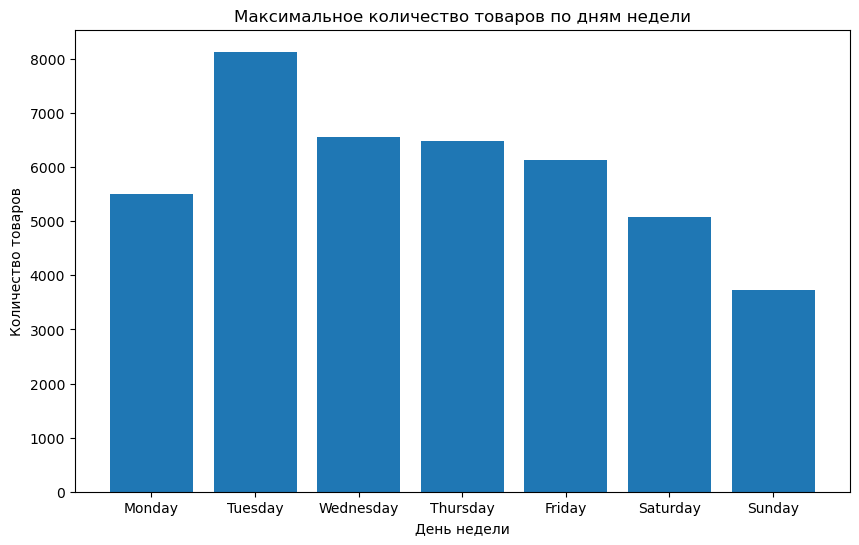

In [56]:
# Создание списка дней недели в нужном порядке
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Группировка по дню недели и подсчет количества уникальных товаров
max_quantity_per_day = result.groupby('day_payments')['product_id'].count()

# Переупорядочивание данных в соответствии с порядком дней недели
max_quantity_per_day = max_quantity_per_day.reindex(days_of_week)

plt.figure(figsize=(10, 6))
# Построение графика
plt.bar(max_quantity_per_day.index, max_quantity_per_day.values)
plt.xlabel('День недели')
plt.ylabel('Количество товаров')
plt.title('Максимальное количество товаров по дням недели')
plt.show()

Ответ на вопрос задания содержится в переменной result. Также, хотелось бы отметить, например, что наибольшее количество товаров покупают во вторник. И товар с id ee3d532c8a438679776d222e997606b3 покупают больше других товаров и это происходит в субботу. 

##  4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. 

В данном задании  покупкой будет считаться дата подтверждения оплаты.

In [57]:
# найдем начальную дату

start_date = df.order_approved_at.min()

start_date


Timestamp('2016-09-15 12:16:38')

In [58]:
# найдем конечную дату

end_date = df.order_approved_at.max()

end_date


Timestamp('2018-09-03 17:40:06')

In [59]:
# сделаем фильтр данных, и уберем даты с неполным месяцем

filtered_df = df[(df['order_approved_at'] >= pd.to_datetime('2016-10-01')) & (df['order_approved_at'] <= pd.to_datetime('2018-08-31'))]

filtered_df['month_year'] = filtered_df['order_approved_at'].dt.to_period('M')

filtered_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_payments,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,Tuesday,2018-02
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,Sunday,2017-08
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Monday,2018-01
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Monday,2018-01


In [60]:
# создадим новые колонки с количеством дней и недель в месяце

filtered_df['count_day_in_month'] = filtered_df['month_year'].dt.daysinmonth

filtered_df['count_week'] = round(filtered_df['count_day_in_month'] / 7,2)

filtered_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_payments,month_year,count_day_in_month,count_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday,2017-10,31,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday,2018-07,31,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday,2018-08,31,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday,2017-11,30,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday,2018-02,28,4.00


In [61]:
filtered_df['count_week'].unique()

array([4.43, 4.29, 4.  ])

In [62]:
# найдем количество заказов у каждого пользователя c группировкой по месяцам и неделям

filtered_df_count_order_month = filtered_df.groupby(['customer_unique_id', 'month_year', 'count_week'], as_index=False)\
                                           .agg({'order_id': 'nunique'})
                                           
                         
filtered_df_count_order_month


,customer_unique_id,month_year,count_week,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1
...,...,...,...,...
97896,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.29,1
97897,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.43,1
97898,ffff371b4d645b6ecea244b27531430a,2017-02,4.00,1
97899,ffff5962728ec6157033ef9805bacc48,2018-05,4.43,1


In [63]:
# посчитаем количество заказов в неделю

filtered_df_count_order_month['count_order_week'] = filtered_df_count_order_month['order_id'] / filtered_df_count_order_month['count_week']

filtered_df_count_order_month['count_order_week'] = filtered_df_count_order_month['count_order_week'].round(2)

filtered_df_count_order_month


,customer_unique_id,month_year,count_week,order_id,count_order_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.23
...,...,...,...,...,...
97896,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.29,1,0.23
97897,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.43,1,0.23
97898,ffff371b4d645b6ecea244b27531430a,2017-02,4.00,1,0.25
97899,ffff5962728ec6157033ef9805bacc48,2018-05,4.43,1,0.23


In [64]:
filtered_df_count_order_month.describe()

,count_week,order_id,count_order_week
count,97901.000000,97901.000000,97901.000000
mean,4.350863,1.013984,0.234904
std,0.123984,0.124105,0.029232
min,4.000000,1.000000,0.230000
25%,4.290000,1.000000,0.230000
50%,4.430000,1.000000,0.230000
75%,4.430000,1.000000,0.230000
max,4.430000,6.000000,1.350000


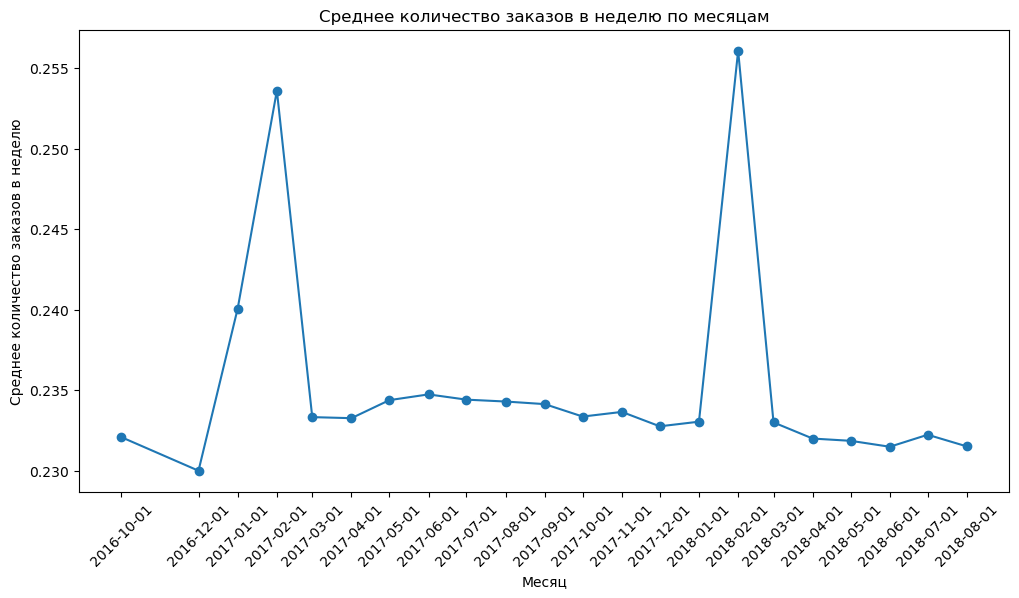

In [65]:
# отобразим среднее значение заказов в неделю по месяцам

monthly_avg_orders = filtered_df_count_order_month.groupby('month_year')['count_order_week'].mean().reset_index()

monthly_avg_orders['month_year'] = pd.to_datetime(monthly_avg_orders['month_year'].dt.to_timestamp())

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(monthly_avg_orders['month_year'], monthly_avg_orders['count_order_week'], marker='o')

ax.set_xlabel('Месяц')
ax.set_ylabel('Среднее количество заказов в неделю')
ax.set_title('Среднее количество заказов в неделю по месяцам')
plt.xticks(monthly_avg_orders['month_year'], rotation=45)
plt.show()

Ответ на вопрос сождержится в переменной filtered_df_count_order_month, что интересно отметить, что максимальное количество покупок в неделю составляет 1.35, а минимальное количество 0.23. Также из графика можно увидеть, что в среднем в неделю совершается 0.23 покупки в неделю. На графике явно наблюдаются два пика до 0.25 в феврале месяце каждого года, скоррее всего существует сезонность товаров.

## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [66]:
# Создание столбца с месяцем и годом заказа

df['order_month_year'] = df['order_purchase_timestamp'].dt.to_period('M')

df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_payments,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday,2018-02


In [67]:
#выведем диапазон дат покупок

print ('первая покупка - ', df.order_month_year.min(), '\n',
       'последняя покупка - ', df.order_month_year.max())

первая покупка -  2016-09 
 последняя покупка -  2018-09


In [68]:
# Создание когорт на основе первого месяца заказа каждого пользователя

df['cohort_month'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')\
                       .dt.to_period('M')

df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_payments,order_month_year,cohort_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday,2017-10,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday,2018-02,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,Tuesday,2018-02,2018-02
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,Sunday,2017-08,2017-08
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Monday,2018-01,2018-01
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Monday,2018-01,2018-01


In [69]:
cohort_data = df.groupby(['cohort_month','order_month_year'], as_index=False)\
                .agg(n_customers=('customer_unique_id', 'nunique'))

cohort_data

,cohort_month,order_month_year,n_customers
0,2016-09,2016-09,4
1,2016-10,2016-10,315
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
...,...,...,...
215,2018-06,2018-08,16
216,2018-07,2018-07,6068
217,2018-07,2018-08,31
218,2018-08,2018-08,6244


In [70]:


cohort_data['period_number'] = (cohort_data['order_month_year'] - cohort_data['cohort_month'])\
                               .apply(attrgetter('n'))

cohort_data

,cohort_month,order_month_year,n_customers,period_number
0,2016-09,2016-09,4,0
1,2016-10,2016-10,315,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
215,2018-06,2018-08,16,2
216,2018-07,2018-07,6068,0
217,2018-07,2018-08,31,1
218,2018-08,2018-08,6244,0


In [71]:
#преобразуем таблицу для наглядности
cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='period_number', values='n_customers')

cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,315.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,762.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1738.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2633.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2348.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,3589.0,17.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3138.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


 Так как в задании требуется провести анализ в период с января по декабрь, а данные для такого диапазона есть только в 2017 году, сделайм датафрейм с покупками в этому году.

In [72]:
cohort_data = cohort_data[cohort_data['cohort_month'].dt.year == 2017]

cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='period_number', values='n_customers')

cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort_month,,,,,,,,,,,,,,,,,,,
2017-01,762.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1738.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03,2633.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2348.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN
2017-05,3589.0,17.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN
2017-06,3138.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3889.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08,4181.0,28.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4127.0,28.0,22.0,12.0,19.0,9.0,9.0,10.0,12.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Для подсчета Retention поделим все столбцы сводной таблицы на значения нулевого столбца, значения получим в отн ед

retention_by_cohorts = cohort_pivot.div(cohort_pivot.iloc[:, 0], axis = 0)

retention_by_cohorts

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort_month,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.003937,0.002625,0.001312,0.003937,0.001312,0.005249,0.001312,0.001312,NaN,0.003937,0.001312,0.007874,0.003937,0.001312,0.001312,0.002625,0.003937,0.001312
2017-02,1.0,0.002301,0.002877,0.001151,0.004028,0.001151,0.002301,0.001726,0.001151,0.002301,0.001151,0.002877,0.001726,0.001726,0.001151,0.000575,0.000575,0.002301,NaN
2017-03,1.0,0.004937,0.003418,0.003798,0.003418,0.001519,0.001519,0.003038,0.003418,0.000760,0.003798,0.001519,0.002279,0.001139,0.001519,0.002279,0.000760,0.001519,NaN
2017-04,1.0,0.005963,0.002129,0.001704,0.003407,0.002555,0.003407,0.002981,0.002981,0.001704,0.002555,0.000852,0.000852,0.000426,0.000852,0.000852,0.002129,NaN,NaN
2017-05,1.0,0.004737,0.005015,0.003901,0.003065,0.003344,0.004179,0.001672,0.002508,0.003065,0.002508,0.003344,0.002508,0.000279,0.001950,0.002508,NaN,NaN,NaN
2017-06,1.0,0.004780,0.003505,0.004143,0.002549,0.003824,0.003824,0.002231,0.001275,0.002231,0.003187,0.003505,0.001593,0.001275,0.001912,NaN,NaN,NaN,NaN
2017-07,1.0,0.005143,0.003600,0.002571,0.002828,0.002057,0.003086,0.001029,0.001800,0.002571,0.002314,0.003086,0.001286,0.002571,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006697,0.003348,0.002631,0.003588,0.005262,0.002870,0.002631,0.001435,0.001435,0.002392,0.001913,0.000957,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006785,0.005331,0.002908,0.004604,0.002181,0.002181,0.002423,0.002908,0.001696,0.002665,0.000727,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#построим тепловую карту(таблицу)

ur_style = (retention_by_cohorts
            .style
            .set_caption('Количество пользователей, удерживаемых в течение N месяцев в разбивке по когорте')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort_month,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,0.13%
2017-02,100.00%,0.23%,0.29%,0.12%,0.40%,0.12%,0.23%,0.17%,0.12%,0.23%,0.12%,0.29%,0.17%,0.17%,0.12%,0.06%,0.06%,0.23%,
2017-03,100.00%,0.49%,0.34%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%,,
2017-05,100.00%,0.47%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.20%,0.25%,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,
2017-07,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,0.31%,0.10%,0.18%,0.26%,0.23%,0.31%,0.13%,0.26%,,,,,
2017-08,100.00%,0.67%,0.33%,0.26%,0.36%,0.53%,0.29%,0.26%,0.14%,0.14%,0.24%,0.19%,0.10%,,,,,,
2017-09,100.00%,0.68%,0.53%,0.29%,0.46%,0.22%,0.22%,0.24%,0.29%,0.17%,0.27%,0.07%,,,,,,,


In [75]:
# Определяем когорту с самым высоким retention на 3-й месяц

retention_by_cohorts.iloc[:, 3].idxmax()


Period('2017-06', 'M')

В период с января по декабрь 2017 года максимальный retention  на 3-й месяц  у когорты пльзователей, совершивших первую покупку 2017-06

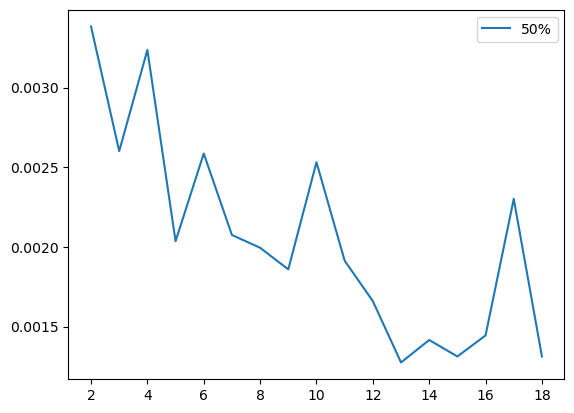

In [76]:
#Покажем как меняется медианная retention c увеличением N

retention_by_cohorts.describe().loc["50%"].reset_index().iloc[2:,1:].plot()
plt.show()

 retention крайне мала и падает с увеличением кол-ва месяцев, возможно стоит над этим поработать

## 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [77]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,day_payments,order_month_year,cohort_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Monday,2017-10,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Thursday,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Wednesday,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Saturday,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Tuesday,2018-02,2018-02


Для симуляции решения реального кейса,  определим "сегодня"  как следующий день после последней покупки. Эта дата будет использоваться в качестве ориентирадля расчета R


In [78]:
# Нахождение последней зарегистрированной покупки

current_date = df['order_purchase_timestamp'].max() + timedelta(days=1)

In [79]:
df['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [80]:
df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [81]:
# Вычисляем разницу между максимальной и минимальной датами
time_diff = df['order_purchase_timestamp'].max() - df['order_purchase_timestamp'].min()

# Вычисляем разницу в месяцах
months_diff = (time_diff / pd.Timedelta(days=1)) / 30

# Получаем только значение 24
months_diff_value = int(months_diff)

print("Всего в данных ",months_diff_value, "месяца")

Всего в данных  24 месяца


In [82]:
# Фильтрация завершенных заказов
#completed_orders_df = df[df['order_status'] == 'delivered']
completed_orders_df = df.copy()
# Вычисление метрик RFM
recency_df = completed_orders_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency_df['recency'] = (current_date - pd.to_datetime(recency_df['order_purchase_timestamp'])).dt.days

frequency_df = completed_orders_df.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency_df.columns = ['customer_unique_id', 'frequency']

monetary_df = completed_orders_df.groupby('customer_unique_id')['price'].sum().reset_index()
monetary_df.columns = ['customer_unique_id', 'monetary']

# Объединение метрик RFM
rfm_df = pd.merge(recency_df, frequency_df, on='customer_unique_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_unique_id')

rfm_df

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,180.00
...,...,...,...,...,...
95983,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,452,2,1570.00
95984,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,267,1,64.89
95985,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,573,1,89.90
95986,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,124,1,115.00


In [83]:
# проверим наличие пустых значений

rfm_df.isnull().sum()

customer_unique_id          0
order_purchase_timestamp    0
recency                     0
frequency                   0
monetary                    0
dtype: int64

In [84]:
# проверим наличие нулевых значений
rfm_df.query('monetary == 0 or frequency == 0')

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
123,004ad212c650c96c8a48f30855a7bcb8,2017-09-24 10:45:10,344,1,0.0
177,0071f46a072a9ae25bbe4438b15efe9c,2017-02-01 00:04:17,580,1,0.0
238,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,720,1,0.0
474,013b083525868a0437652ebf071cda03,2017-12-03 14:28:40,274,1,0.0
773,020d46eecb7bda2b3ab2316a91bb49f6,2017-09-20 17:48:30,348,1,0.0
...,...,...,...,...,...
95267,fe163b538b9f14ce8e554c1ebcc66527,2017-10-30 13:27:56,308,1,0.0
95486,feb643dc81ca576d83810f147e0e089c,2017-03-06 13:20:19,546,1,0.0
95646,ff222edf83338ca6b35f8e29871fa07a,2017-08-17 08:58:59,383,1,0.0
95657,ff28720521c749234b1ba19c9c986f4c,2017-02-15 11:25:14,565,1,0.0


 у нас есть пользователи с нулевой суммой покупок, исключим их из анализа

In [85]:
rfm_df = rfm_df[rfm_df['monetary'] > 0]

 определим границы метрик RFM для разбиения пользователей на группы
 выведем квартили и диапазон значений расчитанных метрик

In [86]:
rfm_df.describe()

,recency,frequency,monetary
count,95398.000000,95398.000000,95398.000000
mean,243.542747,1.180947,142.441185
std,153.107300,0.622109,217.676341
min,1.000000,1.000000,0.850000
25%,119.000000,1.000000,47.900000
50%,224.000000,1.000000,89.900000
75%,353.000000,1.000000,155.000000
max,729.000000,24.000000,13440.000000


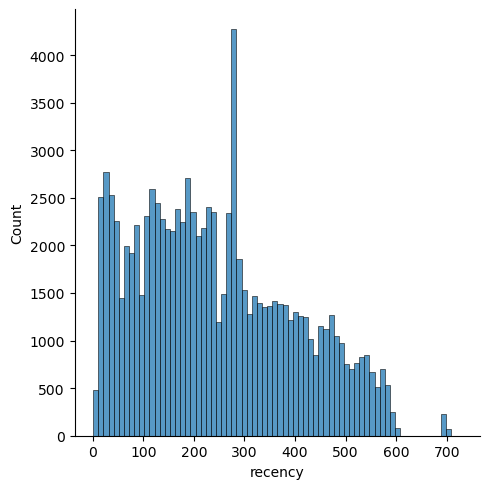

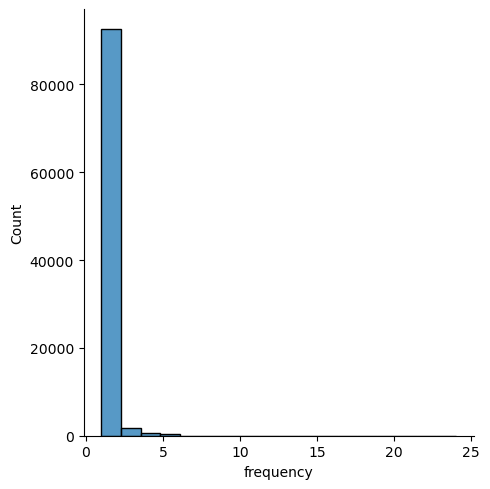

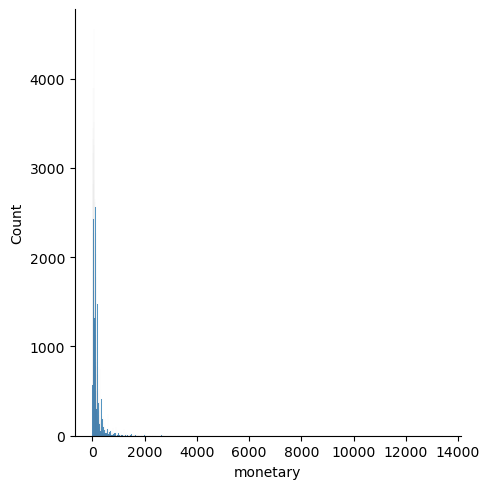

In [87]:
sns.displot(data=rfm_df, x = rfm_df.recency)
plt.show()

sns.displot(data=rfm_df, x = rfm_df.frequency)
plt.show()

sns.displot(data=rfm_df, x = rfm_df.monetary)
plt.show()

Из гистограмм видно, что метрика Recency распределена более менее равномерно, ее можно разделить по квартилям (или другим квантилям), а распределение  метрик Frequency и Monetary смещены влево, их нужно проанализировать внимательнее.

Данные имеют период в 24 месяца, что достаточно длинно для анализа, разделим Recency не поровну, а по приниципу Парето 80/20, на 3 неровные части, удобные для восприятия:

- совершили покупку недавно в течение квартала (последние 3 месяца),

- совершили покупку в диапазоне от 4 до 9 месяцев (второй и третий квартал), 

- совершили покупку в диапазоне от 10 до 24 месяцев (остальные).


In [88]:
rfm =rfm_df.copy()

In [89]:
#зафиксируем границы метрики R, считая что в среднем в месяце 30 дней
R1 = 3*30 # 3-й месяц
R2 = 9*30 # 9-й месяц


In [90]:
#посмотрим кол-во уникальных значений Frequency
rfm.frequency.nunique()

20

In [91]:
#посмотрим уникальные значения Frequency
rfm.frequency.value_counts()

1     83503
2      9019
3      1675
4       631
5       254
6       199
7        46
8        16
11       11
9        11
10       11
12        9
14        3
15        2
13        2
20        2
17        1
18        1
21        1
24        1
Name: frequency, dtype: int64

 Для Frequency есть всего 20 уникальных значений.
Разделим их на 3 группы:

- большинство из них все равно делали одну покупку - это разовые клиенты, 
- также есть клиенты, совершающие покупку крайне редко: 2-3 раза - редкие,
- остальных будем считать постоянными покупателями.

In [92]:
#зафиксируем границы метрики F
F1 = 1
F2 = 3 

In [93]:
#посмотрим кол-во уникальных значений Monetary
rfm.monetary.nunique()

8617

уникальных значений много, поступить так же как с Frequency не получится, гистограмма сильно напоминает экспоненциальную зависимость, посмотрим на гистограмму логарифма метрики М

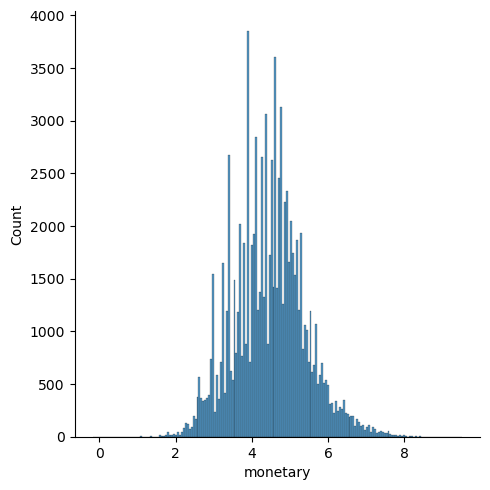

In [94]:
sns.displot(data=rfm, x = np.log(rfm.monetary))
plt.show()

очень похоже, что логарифм М распределен нормально, разобьем это распределение на 3 части: среднее плюс минус СКО, левый хвост, правый хвост

In [95]:
# определим значения интервалов для М

log_M_mean = np.mean(np.log(rfm.monetary)) #среднее
log_M_stdev = np.std(np.log(rfm.monetary))

#вычислим границы М возведением в экспоненту и округлением до целого
M1 = np.exp(log_M_mean - log_M_stdev).round(0)
M2 = np.exp(log_M_mean + log_M_stdev).round(0)

выведем границы метрик, они же будут определять  27 сегментов RFM анализа

In [96]:
print   (f'Границы метрики Recency: \n',
        f'- 1-я группа (давние клиенты) больше {R2} дней \n',
        f'- 2-я группа (относительно недавние клиенты)  больше {R1} и до {R2} дней включительно \n',
        f'- 3-я группа (новички) от 0 до {R1} дней  включительно \n')


print   (f'Границы метрики Frequency: \n',
        f'- 1-я группа (разовые клиенты) от 0 до {F1} покупок включительно \n',
        f'- 2-я группа (редкие клиенты)  больше {F1} и до {F2} покупок включительно \n',
        f'- 3-я группа (постоянные клиенты) больше {F2} покупок \n')

print   (f'Границы метрики Мonetary: \n',
        f'- 1-я группа (маленькая сумма) от 0 до {M1} рублей включительно \n',
        f'- 2-я группа (средняя сумма)  больше {M1} и до {M2} рублей включительно \n',
        f'- 3-я группа (большая сумма) больше {M2} рублей \n')

Границы метрики Recency: 
 - 1-я группа (давние клиенты) больше 270 дней 
 - 2-я группа (относительно недавние клиенты)  больше 90 и до 270 дней включительно 
 - 3-я группа (новички) от 0 до 90 дней  включительно 

Границы метрики Frequency: 
 - 1-я группа (разовые клиенты) от 0 до 1 покупок включительно 
 - 2-я группа (редкие клиенты)  больше 1 и до 3 покупок включительно 
 - 3-я группа (постоянные клиенты) больше 3 покупок 

Границы метрики Мonetary: 
 - 1-я группа (маленькая сумма) от 0 до 34.0 рублей включительно 
 - 2-я группа (средняя сумма)  больше 34.0 и до 224.0 рублей включительно 
 - 3-я группа (большая сумма) больше 224.0 рублей 



Разделим данные на кластеры RFM

In [97]:
# Воспользуемся pd.cut чтобы создать метки групп
rfm['R'] = pd.cut(rfm.recency, bins = [0, R1, R2, rfm.recency.max()], 
                                     labels = ['3 ', '2 ', '1 '], duplicates='drop')
rfm['F'] = pd.cut(rfm.frequency, bins = [0, F1, F2, rfm.frequency.max()], 
                                     labels = ['1 ', '2 ', '3 '], duplicates='drop')
rfm['M'] = pd.cut(rfm.monetary, bins = [0, M1, M2, rfm.monetary.max()], 
                                     labels = ['1 ', '2 ', '3 '], duplicates='drop')

# Формируем названия кластеров
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,129.90,2,1,2,2 1 2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,18.90,2,1,1,2 1 1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,69.00,1,1,2,1 1 2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,25.99,1,1,1,1 1 1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,180.00,1,1,2,1 1 2


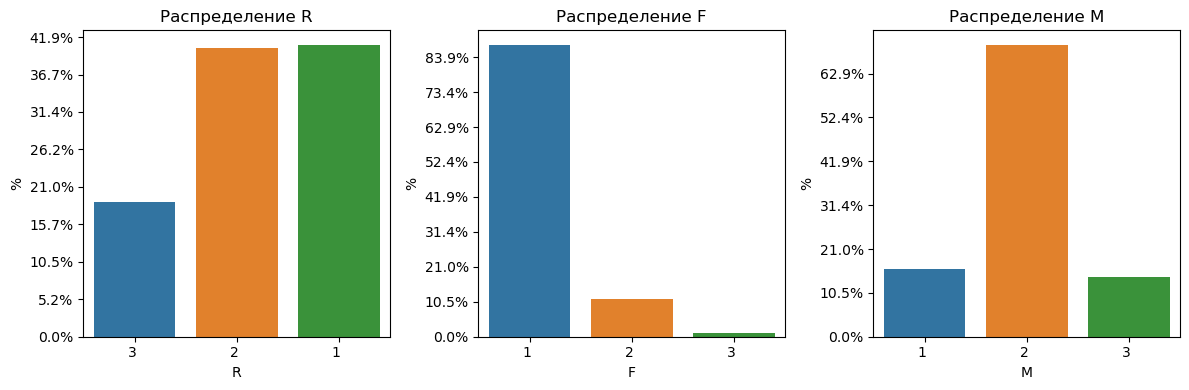

In [98]:
# Список столбцов для построения графиков
columns = ['R', 'F', 'M']

# Создаем сетку графиков
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Итерируемся по столбцам и строим графики
for i, column in enumerate(columns):
    # Получаем количество значений в текущем столбце
    value_counts = rfm[column].value_counts()
    
    # Вычисляем процентное соотношение
    percentages = value_counts / len(rfm) * 100
    
    # Строим барплот
    sns.countplot(data=rfm, x=column, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('%')
    axes[i].set_title(f'Распределение {column}')
    
    # Изменяем метки на оси ординат на проценты
    axes[i].set_yticklabels(['{:.1f}%'.format(x) for x in axes[i].get_yticks() / len(rfm) * 100])

plt.tight_layout()
plt.show()

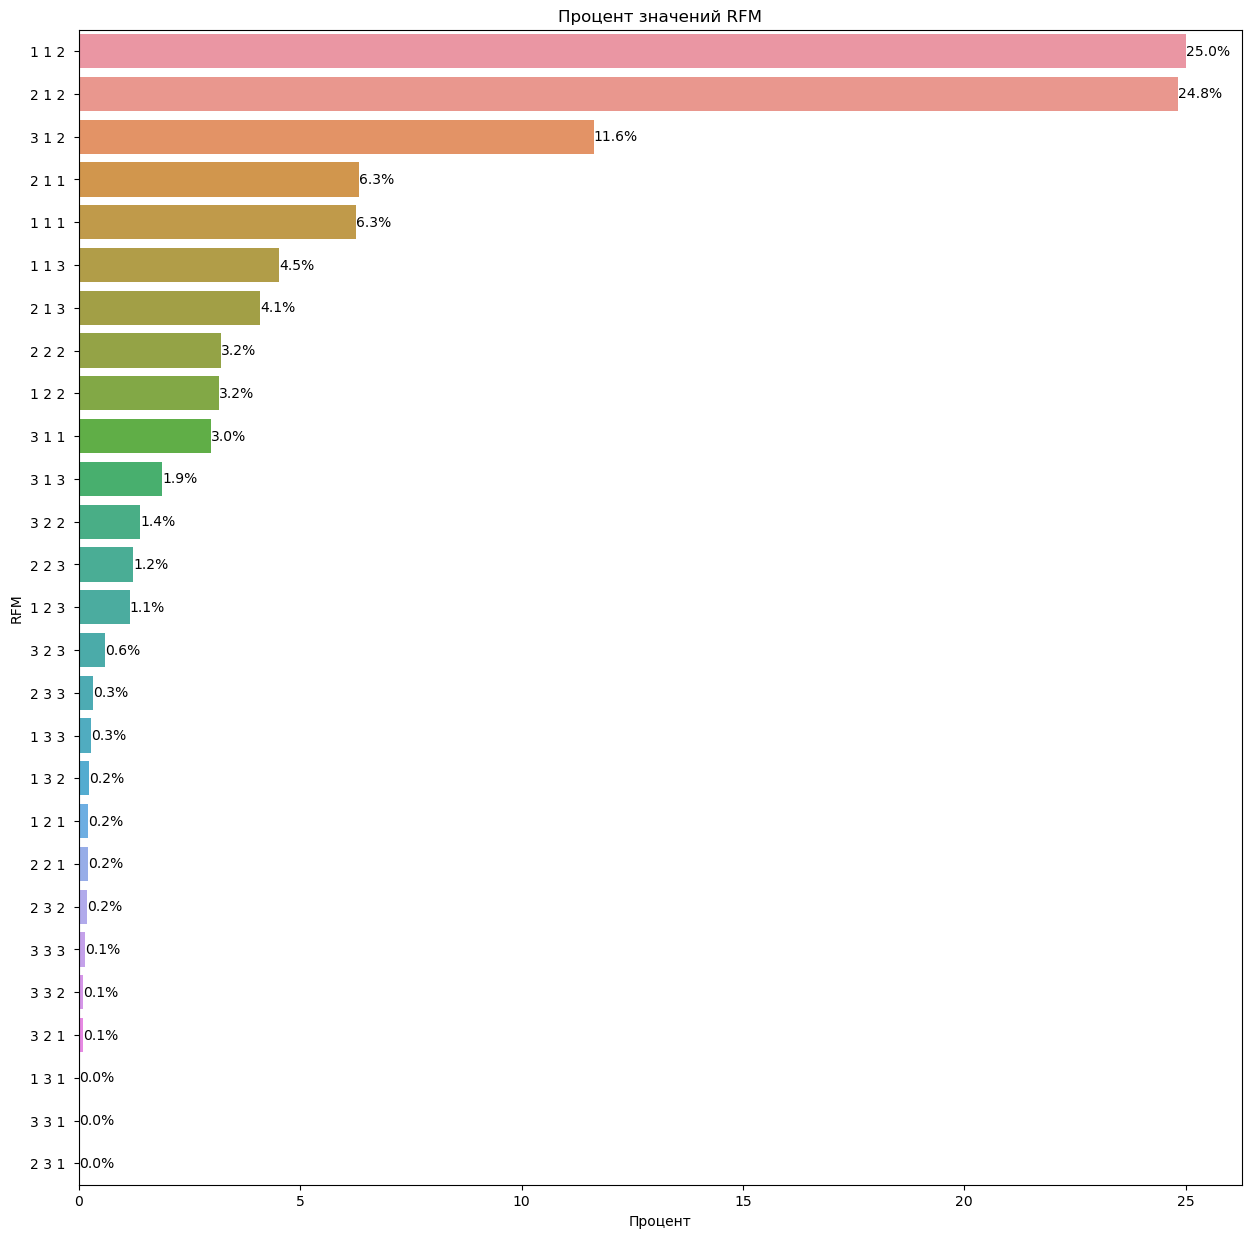

In [99]:
# Получаем количество значений в столбце RFM
value_counts = rfm['RFM'].value_counts()

# Вычисляем процентное соотношение
percentages = value_counts / len(rfm) * 100

# Создаем новую фигуру с заданным размером
plt.figure(figsize=(15, 15))

# Строим горизонтальный барплот
sns.barplot(x=percentages, y=value_counts.index, orient='h')
plt.xlabel('Процент')
plt.ylabel('RFM')
plt.title('Процент значений RFM')



# Добавляем процентные значения на график
for i, p in enumerate(percentages):
    plt.text(p, i, f'{p:.1f}%', ha='left', va='center')

plt.show()

Выводы

1. Большинство пользователей относятся к кластерам 112, 212, 312, то есть они совершают одну покупку на среднюю сумму.
2. Распредение R показывает, что количество покупок пользователями в предыдущий год росло, а в последние 3 квартала вышло на плато, с учетом предыдущего вывода рекомендуется (если, конечно, разовая продажа это не специфика бизнеса) в первую очередь работать над метрикой F - повторными покупками (лояльностью) пользователей,  совершивших покупку недавно или относительно недавно на среднюю или высокую сумму - кластеры, где M и R равны 2 или 3.

 Границы кластеров
 
Границы метрики Recency: 

- 1-я группа (давние клиенты) больше 270 дней 
- 2-я группа (относительно недавние клиенты)  больше 90 и до 270 дней включительно
- 3-я группа (новички) от 0 до 90 дней  включительно 

Границы метрики Frequency: 

- 1-я группа (разовые клиенты) от 0 до 1 покупок включительно 
- 2-я группа (редкие клиенты)  больше 1 и до 3 покупок включительно
- 3-я группа (постоянные клиенты) больше 3 покупок 

Границы метрики Мonetary: 

- 1-я группа (маленькая сумма) от 0 до 34.0 рублей включительно 
- 2-я группа (средняя сумма)  больше 34.0 и до 224.0 рублей включительно 
- 3-я группа (большая сумма) больше 224.0 рублей

Используем метод квантилей

In [100]:
# Каждый клиент получит ранг от 1 до 3 для каждого параметра. Используем метод квантилей

quintiles = rfm_df[['recency', 'frequency', 'monetary']].quantile([.3, .6]).to_dict()

quintiles


{'recency': {0.3: 140.0, 0.6: 273.0},
 'frequency': {0.3: 1.0, 0.6: 1.0},
 'monetary': {0.3: 53.0, 0.6: 109.9}}

In [101]:
# расчета оценок (score) для переменных Recency, Frequency и Monetary.

def r_score(x):
    if x <= quintiles['recency'][.3]:  
        return 3
    elif x <= quintiles['recency'][.6]: 
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['monetary'][.3]:  
        return 1
    elif x <= quintiles['monetary'][.6]:   
        return 2
    else:
        return 3   
# frequency делить на квантили не рационально т.к. 25%, 50% и 75% квантиль равен 1    
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3    

In [102]:
# применим функции присвоения оценок

rfm_df['R'] = rfm_df['recency'].apply(lambda x: r_score(x))
rfm_df['F'] = rfm_df['frequency'].apply(lambda x: f_score(x))
rfm_df['M'] = rfm_df['monetary'].apply(lambda x: m_score(x))

rfm_df

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,129.90,3,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,25.99,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,180.00,1,1,3
...,...,...,...,...,...,...,...,...
95983,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,452,2,1570.00,1,2,3
95984,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,267,1,64.89,2,1,2
95985,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,573,1,89.90,1,1,2
95986,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,124,1,115.00,3,1,3


In [103]:
# получаем сегменты клиентов из оценки RFM

rfm_df['RFM_Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

rfm_df.head()


,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,180.00,1,1,3,113


In [104]:
# посчитаем количество поьзователей в каждом сегменте

count_rfm_df = rfm_df.groupby('RFM_Score', as_index = False)\
                  .agg({'customer_unique_id':'count'})
                  
count_rfm_df = count_rfm_df.sort_values('customer_unique_id',ascending=False) 


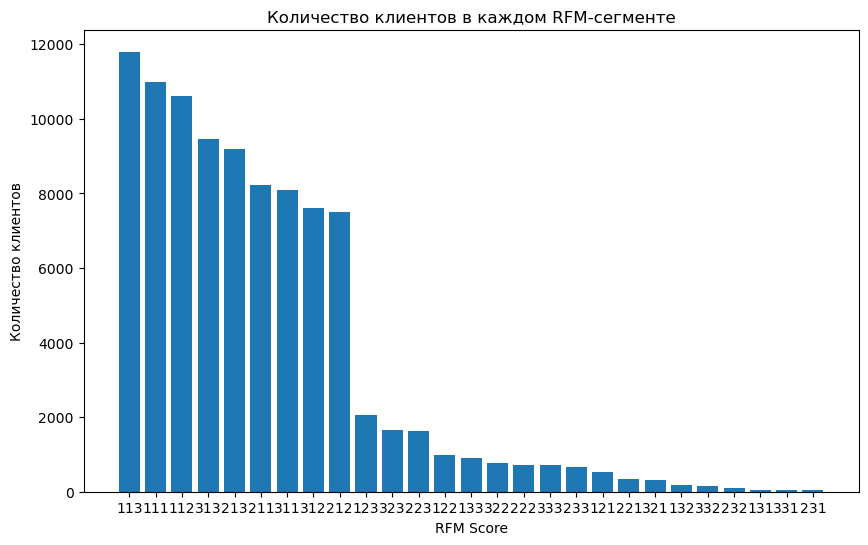

In [105]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(count_rfm_df['RFM_Score'], count_rfm_df['customer_unique_id'])
plt.xlabel('RFM Score')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов в каждом RFM-сегменте')
plt.show()

 По давности заказа (recency):
 
1 — давние клиенты;
2 — относительно недавние клиенты;
3 — недавние клиенты.

По частоте покупок (frequency):

1 — покупает очень редко (единичные заказы);
2 — покупает нечасто;
3 — покупает часто.

По сумме покупок (monetary):

1 — маленькая сумма;
2 — средняя сумма;
3 — большая сумма.

Например, пользователь «111» покупал давно, один раз и на маленькую сумму.  Или пользователь «333»: покупает часто, на большую сумму и последняя покупка была недавно. Это наши лучшие клиенты.

 Определение сегментов
Лучшие клиенты (Чемпионы):
RFM_score: 333.
Эти клиенты имеют высокие оценки во всех трех категориях (Recency, Frequency, Monetary)

Лояльные клиенты (Лояльные пользователи):
RFM_score: 332, 331, 322, 321.
Эти клиенты имеют высокую оценку по Frequency и Monetary, но могли не совершать покупки очень недавно.

Клиенты в зоне риска (Рисковые пользователи):
RFM_score: 231, 232, 233, 132, 133, 131, 222, 223, 213, 212, 221, 211.
Эти клиенты совершали покупки недавно и потратили много денег, но их частота покупок снижается.

Новички (Новые пользователи):
RFM_score: 111, 112, 113.
Это клиенты, которые недавно начали совершать покупки.

Прошлые клиенты (Давние пользователи):
Все остальные RFM_score.
Эти клиенты могли быть активными ранее, но уже давно не совершали покупки.

In [106]:
rfm_df['RFM_Score'] = rfm_df['RFM_Score'].astype(int)

In [107]:
def assign_segment(x):
    if x['RFM_Score'] == 333:
        return 'Чемпионы'
    elif x['RFM_Score'] in [332, 331, 322, 321]:
        return 'Лояльные пользователи'
    elif x['RFM_Score'] in [231, 232, 233, 132, 133, 131, 222, 223, 213, 212, 221, 211]:
        return 'Рисковые пользователи'
    elif x['RFM_Score'] in [111, 112, 113]:
        return 'Новые пользователи'
    else:
        return 'Давние пользователи'

In [108]:
# определеми сегменты

rfm_df['segment'] = rfm_df.apply(assign_segment, axis=1)


In [109]:
segments = rfm_df.groupby('segment', as_index = False).agg({'customer_unique_id':'count'})

segments = segments.sort_values('customer_unique_id', ascending=False)

segments

,segment,customer_unique_id
2,Новые пользователи,33398
0,Давние пользователи,30410
3,Рисковые пользователи,29585
1,Лояльные пользователи,1294
4,Чемпионы,711


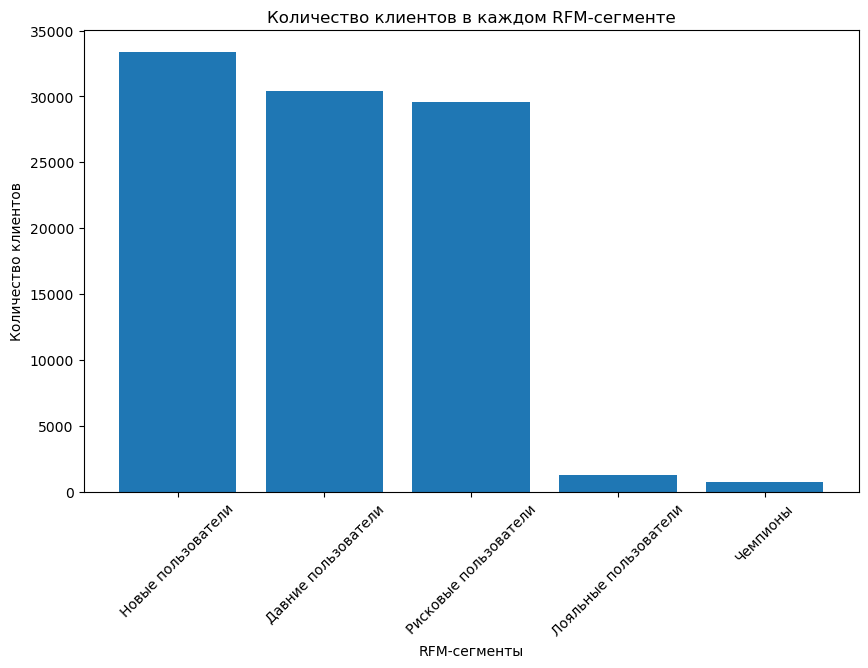

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(segments['segment'], segments['customer_unique_id'])
plt.xlabel('RFM-сегменты')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов в каждом RFM-сегменте')
plt.xticks(rotation=45)
plt.show()

Наибольшее количество пользователей - это новые, и стоит обратить внимание на лояльных клиентов и чемпионов.